In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [2]:
yolo=cv2.dnn.readNet("./yolov3.weights","./yolov3.cfg")

In [3]:
classes=[]
classes = []
with open("./coco.names", "r") as f:
    classes =f.read().splitlines()
classes
len(classes)

80

In [4]:
img=cv2.imread(r"C:\Users\lenovo\Downloads\cat.webp")
blob=cv2.dnn.blobFromImage(img, 1/255,(320,320),(0,0,0), swapRB= True, crop=False)

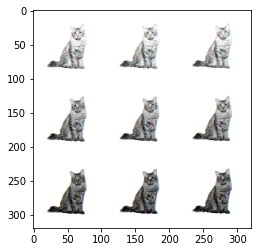

In [5]:
i=blob[0].reshape(320,320,3)
plt.imshow(i)

In [6]:
yolo.setInput(blob)

In [7]:
layer_names = yolo.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in yolo.getUnconnectedOutLayers()]

# Forward pass
layer_outputs = yolo.forward(output_layers)

In [8]:
boxes=[]
confidences=[]
class_ids=[]

In [9]:
for output in layer_outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.7 :
            
            height, width, channels = img.shape
            center_x= int (detection[0]*width)
            center_y=int(detection[1]*height)
            
            w= int(detection[2]*width)
            h=int(detection[3]*height)
            
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
    

In [10]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [11]:
font=cv2.FONT_HERSHEY_PLAIN
colors=np.random.uniform(0,255,size=(len(boxes),3))

In [12]:
for i in indexes.flatten():
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    confi = str(round(confidences[i], 2))
    color = colors[i]

    # Draw bounding box
    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)  # Increase thickness to 2 for clearer bounding box

    # Draw text label
    cv2.putText(img, f"{label} {confi}", (x, y - 5), font, 0.7, (255, 255, 255), 2)  # Use white color for text, increase thickness to 2

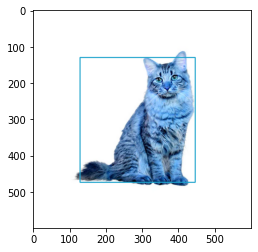

In [16]:
plt.imshow(img)
plt.show()

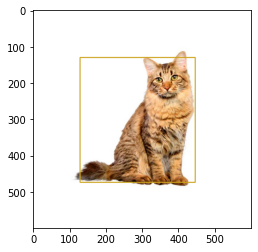

In [18]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB before displaying with plt.imshow()
plt.show()